In [41]:
import pandas as p,numpy as n
import nltk
import joblib
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import LabelEncoder as Label
import plotly.express,seaborn as sea
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV ,RandomizedSearchCV
from sklearn.metrics import r2_score,accuracy_score,f1_score,confusion_matrix,precision_score
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

In [4]:
spam=p.read_csv('/content/spam.csv',encoding='latin')
spam.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)
spam.rename(columns={'v1':'Spam/NotSpam','v2':'Messages'},inplace=True)

In [89]:
x,test,y,w=train_test_split(spam['Messages'],spam["Spam/NotSpam"],test_size=0.3)
test

,Messages
4407,take care sleep need learn chang need get conv...
201,hello darlin ive finish colleg txt u finish u ...
2281,hav almost reach call unabl connect u
148,k delet contact
4790,send resum
...,...
3519,reach 9 tell dont know
4234,freemsg record indic may entitl 3750 pound acc...
3751,u earli
1943,got lousi sleep kept wake everi 2 hour see cat...


In [5]:
'''
Steps before model training
Data Cleaning (Removing outliers,noisydata, correct data formates,removing duplicate data)
Exploratory data analysis for understanding the data
Data preprocessig(feature enginnering)
Model Training, testing and then deplyoment
'''

'\nSteps before model training\nData Cleaning (Removing outliers,noisydata, correct data formates,removing duplicate data)\nExploratory data analysis for understanding the data\nData preprocessig(feature enginnering)\nModel Training, testing and then deplyoment\n'

In [6]:
label=Label()
spam['Spam/NotSpam']=label.fit_transform(spam['Spam/NotSpam'])

In [7]:
label=Label()
spam['Spam/NotSpam']=label.fit_transform(spam['Spam/NotSpam'])

In [8]:
#removing duplicated
spam.duplicated().sum()
spam.drop_duplicates(inplace=True)


In [9]:
#checking for the null values
spam.isnull().sum()

,0
Spam/NotSpam,0
Messages,0


([<matplotlib.patches.Wedge at 0x7fb7a98106d0>,
 [Text(-1.014499732282844, 0.4251944181172162, 'NotSpam'),
  Text(1.0144998708287172, -0.42519408755122207, 'Spam')],
 [Text(-0.5533634903360967, 0.2319242280639361, '87.37'),
  Text(0.553363565906573, -0.231924047755212, '12.63')])

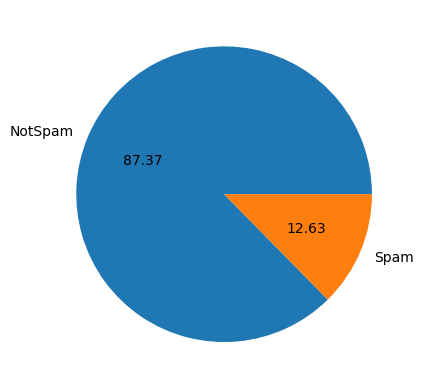

In [10]:
#Starting to perform exploratory data analysis
plt.pie(spam['Spam/NotSpam'].value_counts(),labels=["NotSpam","Spam"],autopct="%0.2f")
#Clearly visible that the data is imbalanced

In [11]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [12]:
spam['no_of_characters']=spam['Messages'].apply(len)
spam['no_of_words']=spam['Messages'].apply(lambda x:len(nltk.word_tokenize(x)))
spam['no_of_sentences']=spam['Messages'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [13]:
spam.loc[:,['no_of_characters','no_of_words','no_of_sentences']].describe()

,no_of_characters,no_of_words,no_of_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='no_of_characters', ylabel='Count'>

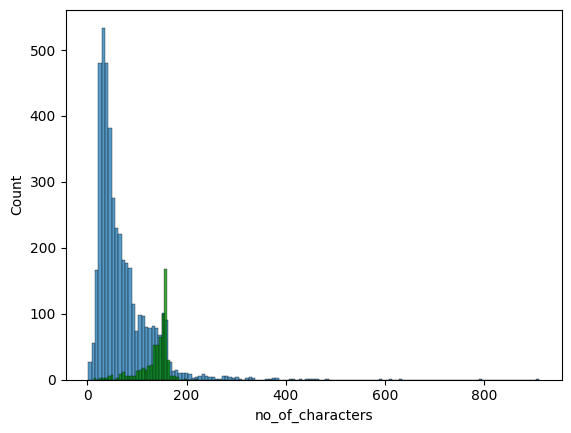

In [14]:
sea.histplot(spam,x=spam[spam['Spam/NotSpam']==0]['no_of_characters'])
sea.histplot(spam,x=spam[spam['Spam/NotSpam']==1]['no_of_characters'],color='Green')

<Axes: xlabel='no_of_words', ylabel='Count'>

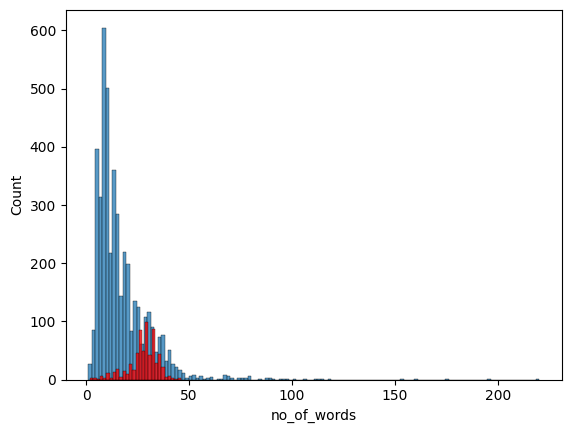

In [15]:
sea.histplot(spam[spam['Spam/NotSpam']==0]['no_of_words'])
sea.histplot(spam[spam['Spam/NotSpam']==1]['no_of_words'],color='red')

<Axes: xlabel='no_of_sentences', ylabel='Count'>

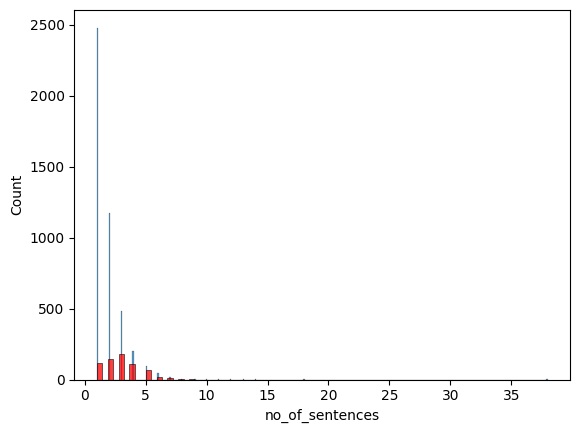

In [16]:
sea.histplot(spam[spam['Spam/NotSpam']==0]['no_of_sentences'])
sea.histplot(spam[spam['Spam/NotSpam']==1]['no_of_sentences'],color='red')

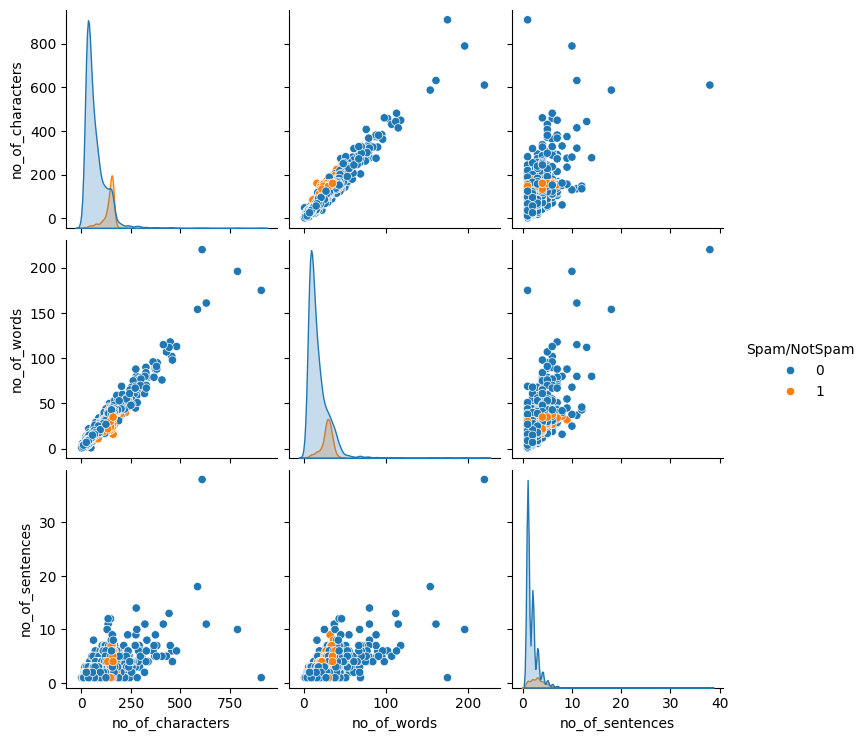

In [17]:
sea.pairplot(spam,hue='Spam/NotSpam')

<Axes: >

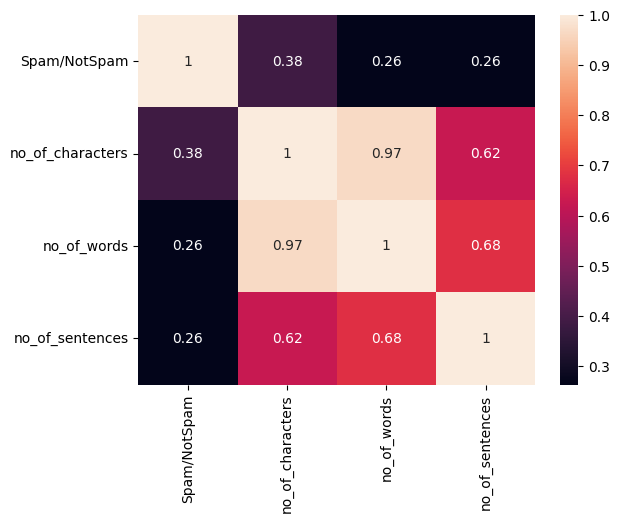

In [18]:
sea.heatmap(spam[['Spam/NotSpam','no_of_characters','no_of_words','no_of_sentences']].corr(),annot=True)

In [19]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer as pst
def optimized_text_processing(text):
  stopword=stopwords.words('english')
  ps=pst()
  text=text.lower()
  temp=[]
  for i in nltk.word_tokenize(text):
    if not i.isalnum():
      continue
    if i in stopword:
      continue
    temp.append(ps.stem(i))
  return " ".join(temp)
spam['Messages']=spam['Messages'].apply(optimized_text_processing)

In [21]:
spam

,Spam/NotSpam,Messages,no_of_characters,no_of_words,no_of_sentences
0,0,go jurong point crazi avail bugi n great world...,111,24,2
1,0,ok lar joke wif u oni,29,8,2
2,1,free entri 2 wkli comp win fa cup final tkt 21...,155,37,2
3,0,u dun say earli hor u c alreadi say,49,13,1
4,0,nah think goe usf live around though,61,15,1
...,...,...,...,...,...
5567,1,2nd time tri 2 contact u pound prize 2 claim e...,161,35,4
5568,0,b go esplanad fr home,37,9,1
5569,0,piti mood suggest,57,15,2
5570,0,guy bitch act like interest buy someth els nex...,125,27,1


In [22]:
from wordcloud import WordCloud as wc
word=wc(width=300,height=300,min_font_size=7,background_color='white')
word.generate(spam[spam["Spam/NotSpam"]==1]['Messages'].iloc[:30].str.cat(sep=' '))

In [23]:
import plotly.express as px
px.imshow(word)


In [24]:
notspamwords=p.Series(" ".join(spam[spam["Spam/NotSpam"]==0]["Messages"]).split(" "))
spamwords=p.Series(" ".join(spam[spam['Spam/NotSpam']==1]["Messages"]).split())

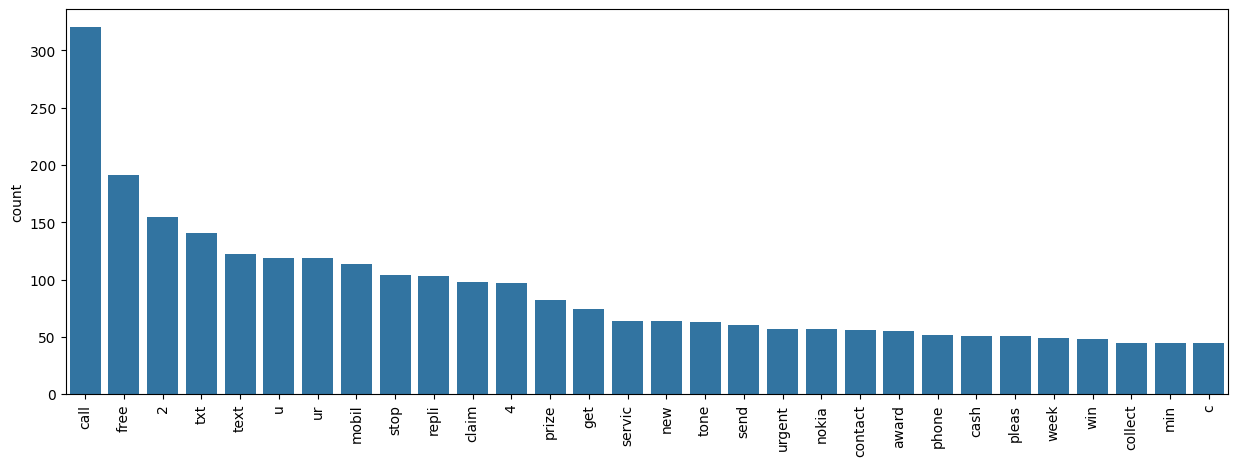

In [25]:
plt.figure(figsize=(15,5))
sea.barplot(spamwords.value_counts().iloc[:30],orient='v')
plt.xticks(rotation='vertical')
plt.show()

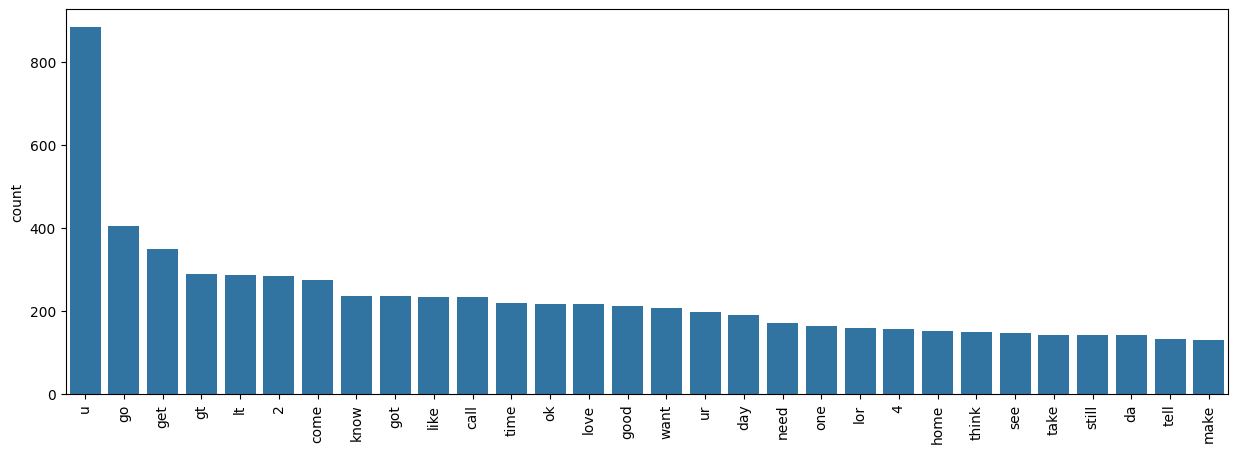

In [26]:
plt.figure(figsize=(15,5))
sea.barplot(notspamwords.value_counts().iloc[:30],orient='v')
plt.xticks(rotation='vertical')
plt.show()

In [61]:
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)
xtrain,xtest,ytrain,ytest=train_test_split(tfidf.fit_transform(spam['Messages']).toarray(),spam['Spam/NotSpam'].values,train_size=0.7)

ValueError: Data must be 1-dimensional, got ndarray of shape (1551, 3000) instead

In [36]:
gnb=GaussianNB()
mnb=MultinomialNB(fit_prior=True)
bnb=BernoulliNB(fit_prior=True)
def fit_all_NB(xtrain,ytrain):
  return gnb.fit(xtrain,ytrain),mnb.fit(xtrain,ytrain),bnb.fit(xtrain,ytrain)
def predict_all(xtest):
  return gnb.predict(xtest),mnb.predict(xtest),bnb.predict(xtest)
def calculate_score(ytest,ypred,metric):
    return metric(ytest,ypred)
fit_all_NB(xtrain,ytrain)
gnb_predict,mnb_predict,bnb_predict=predict_all(xtest)


In [37]:
#calculating scores of gaussian naive bayes
gnbscore=[calculate_score(ytest,gnb_predict,accuracy_score),calculate_score(ytest,gnb_predict,precision_score),calculate_score(ytest,gnb_predict,f1_score)]
print(f" Score of accuracy {gnbscore[0]}\n Score of Precision:{gnbscore[1]}\n Score of f1_Score{gnbscore[2]}")

 Score of accuracy 0.8716956802063185
 Score of Precision:0.5075075075075075
 Score of f1_Score0.6294227188081937


In [39]:
#calculating scores of multinomial naive bayes
mnbscore=[calculate_score(ytest,mnb_predict,accuracy_score),calculate_score(ytest,mnb_predict,precision_score),calculate_score(ytest,mnb_predict,f1_score)]
print(f" Score of accuracy {mnbscore[0]}\n Score of Precision:{mnbscore[1]}\n Score of f1_Score {mnbscore[2]}")

 Score of accuracy 0.9626047711154094
 Score of Precision:1.0
 Score of f1_Score 0.8342857142857143


In [38]:
#calculating scores of bernaouli naive bayes
bnbscore=[calculate_score(ytest,bnb_predict,accuracy_score),calculate_score(ytest,bnb_predict,precision_score),calculate_score(ytest,bnb_predict,f1_score)]
print(f" Score of accuracy {bnbscore[0]}\n Score of Precision:{bnbscore[1]}\n Score of f1_Score{bnbscore[2]}")

 Score of accuracy 0.9709864603481625
 Score of Precision:0.9818181818181818
 Score of f1_Score0.8780487804878049


In [42]:
joblib.dump(tfidf,'Vectorizer.pkl')#model for converting text to numerical vectorsss
joblib.dump(mnb,'model.pkl')

['model.pkl']